# Entendimento do Problema e Objetivo


## Objetivo:

O objetivo deste projeto é realizar uma análise avançada nos dados de desempenho de jogadores de futebol para identificar padrões e agrupá-los com base em seus estilos de jogo. Utilizando a técnica de clusterização, pretendemos transcender as posições declaradas, permitindo categorizar jogadores de maneira mais ampla e significativa, como criadores de jogadas, defensores agressivos, finalizadores, entre outros.

Essa abordagem tem como foco responder às seguintes perguntas:

- Quais são os grupos de jogadores com características semelhantes de desempenho, independentemente de suas posições em campo?

- Como esses grupos podem ser interpretados em termos de estilos de jogo?

- Quais insights podem ser extraídos para auxiliar clubes, analistas e treinadores na formação de estratégias ou aquisição de talentos?

## Relevância do Projeto:
Este projeto oferece valor prático para:

- Clubes e treinadores, que podem usar os grupos para identificar talentos ou ajustar táticas.

- Analistas esportivos, que buscam compreender melhor os jogadores além das classificações tradicionais.

- Jogadores, que podem usar os resultados para posicionar suas habilidades no mercado esportivo.

## Descrição das Variáveis:

Abaixo está a descrição das principais variáveis disponíveis na base de dados. Cada variável foi avaliada com o objetivo de entender seu potencial para representar estilos de jogo e desempenho.

| **Nome da Variável**       | **Descrição**                                                                 | **Tipo de Dado**  |
|----------------------------|-----------------------------------------------------------------------------|------------------|
| `id_player`               | Identificador único do jogador.                                             | Categórico       |
| `player_name`             | Nome do jogador.                                                            | Texto            |
| `nationality`             | Nacionalidade do jogador.                                                   | Categórico       |
| `field_position`          | Posição declarada do jogador (Ex.: Forward, Midfielder, etc.).               | Categórico       |
| `position`                | Posição específica em campo (Ex.: Striker, Central Midfielder).              | Categórico       |
| `weight(kg)`              | Peso do jogador em quilogramas.                                             | Numérico         |
| `height(cm)`              | Altura do jogador em centímetros.                                           | Numérico         |
| `age`                     | Idade do jogador.                                                          | Numérico         |
| `tackles_lost`            | Número de desarmes perdidos pelo jogador.                                   | Numérico         |
| `clearance_attempted`     | Tentativas de afastar a bola da defesa.                                      | Numérico         |
| `total_attempts`          | Total de tentativas de chute.                                               | Numérico         |
| `attempts_on_target`      | Tentativas de chute no alvo.                                                | Numérico         |
| `attempts_off_target`     | Tentativas de chute fora do alvo.                                           | Numérico         |
| `blocked`                 | Número de chutes bloqueados.                                                | Numérico         |
| `assists`                 | Total de assistências realizadas.                                           | Numérico         |
| `corners_taken`           | Total de escanteios cobrados.                                               | Numérico         |
| `offsides`                | Total de impedimentos cometidos.                                            | Numérico         |
| `dribbles`                | Total de dribles realizados.                                                | Numérico         |


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Pré-Processamento dos Dados

In [18]:
# Carregar o arquivo enviado pelo usuário
file_path = '/content/final_players_data.csv'
data = pd.read_csv(file_path)

# Exibir as primeiras linhas da base de dados para revisão
data.head()

,id_player,player_name,nationality,field_position,position,weight(kg),height(cm),age,id_team,player_image,...,tackles_lost,clearance_attempted,total_attempts,attempts_on_target,attempts_off_target,blocked,assists,corners_taken,offsides,dribbles
0,250016833,Harry Kane,England,Forward,STRIKER,65.0,188.0,31,50037,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,1.0,1.0,20.0,12.0,6.0,2.0,1.0,0.0,3.0,10.0
1,250105927,Viktor Gyökeres,Sweden,Forward,NaN,NaN,NaN,26,50149,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,2.0,5.0,15.0,8.0,3.0,4.0,0.0,0.0,3.0,6.0
2,250121533,Vinícius Júnior,Brazil,Forward,UNKNOWN,NaN,NaN,24,50051,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,5.0,0.0,17.0,10.0,6.0,1.0,0.0,7.0,0.0,34.0
3,250121294,Tijjani Reijnders,Netherlands,Midfielder,CENTRAL_MIDFIELDER,NaN,NaN,26,50058,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,2.0,1.0,8.0,5.0,1.0,2.0,0.0,0.0,1.0,7.0
4,250160436,Maghnes Akliouche,France,Midfielder,UNKNOWN,NaN,NaN,22,50023,https://img.uefa.com/imgml/TP/players/1/2025/3...,...,3.0,2.0,10.0,4.0,3.0,3.0,1.0,9.0,2.0,10.0


In [19]:
# Excluir a coluna 'player_image'
data.drop(columns=['player_image'], inplace=True)

# Confirmar se a coluna foi removida
data.head()

,id_player,player_name,nationality,field_position,position,weight(kg),height(cm),age,id_team,distance_covered(km/h),...,tackles_lost,clearance_attempted,total_attempts,attempts_on_target,attempts_off_target,blocked,assists,corners_taken,offsides,dribbles
0,250016833,Harry Kane,England,Forward,STRIKER,65.0,188.0,31,50037,43.71,...,1.0,1.0,20.0,12.0,6.0,2.0,1.0,0.0,3.0,10.0
1,250105927,Viktor Gyökeres,Sweden,Forward,NaN,NaN,NaN,26,50149,41.94,...,2.0,5.0,15.0,8.0,3.0,4.0,0.0,0.0,3.0,6.0
2,250121533,Vinícius Júnior,Brazil,Forward,UNKNOWN,NaN,NaN,24,50051,38.39,...,5.0,0.0,17.0,10.0,6.0,1.0,0.0,7.0,0.0,34.0
3,250121294,Tijjani Reijnders,Netherlands,Midfielder,CENTRAL_MIDFIELDER,NaN,NaN,26,50058,46.61,...,2.0,1.0,8.0,5.0,1.0,2.0,0.0,0.0,1.0,7.0
4,250160436,Maghnes Akliouche,France,Midfielder,UNKNOWN,NaN,NaN,22,50023,44.67,...,3.0,2.0,10.0,4.0,3.0,3.0,1.0,9.0,2.0,10.0


In [20]:
# Verificar a estrutura dos dados
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_player               908 non-null    int64  
 1   player_name             908 non-null    object 
 2   nationality             908 non-null    object 
 3   field_position          908 non-null    object 
 4   position                701 non-null    object 
 5   weight(kg)              154 non-null    float64
 6   height(cm)              179 non-null    float64
 7   age                     908 non-null    int64  
 8   id_team                 908 non-null    int64  
 9   distance_covered(km/h)  727 non-null    float64
 10  top_speed               727 non-null    float64
 11  minutes_played          727 non-null    float64
 12  matches_appareance      727 non-null    float64
 13  goals                   727 non-null    float64
 14  inside_area             727 non-null    fl

In [21]:
# Análise descritiva inicial
data_description = data.describe()
data_description

,id_player,weight(kg),height(cm),age,id_team,distance_covered(km/h),top_speed,minutes_played,matches_appareance,goals,...,tackles_lost,clearance_attempted,total_attempts,attempts_on_target,attempts_off_target,blocked,assists,corners_taken,offsides,dribbles
count,9.080000e+02,154.000000,179.000000,908.000000,9.080000e+02,727.000000,727.000000,727.000000,727.000000,727.000000,...,727.000000,727.000000,727.000000,727.000000,727.00000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,2.414979e+08,75.727273,183.039106,24.711454,2.695953e+05,22.379546,31.217923,190.429161,2.990371,0.283356,...,1.579092,3.291609,2.569464,0.928473,0.96011,0.680880,0.217331,0.910591,0.350757,2.795048
std,4.522600e+07,7.381546,6.492314,4.695866,7.156461e+05,13.723543,2.788519,117.947087,1.088971,0.715461,...,1.835974,4.623300,3.272357,1.571212,1.40240,1.120781,0.550058,2.605141,0.805933,4.318016
min,6.917800e+04,58.000000,170.000000,16.000000,7.889000e+03,0.330000,19.510000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500805e+08,70.000000,178.000000,21.000000,5.005100e+04,10.460000,30.225000,90.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.501215e+08,75.000000,183.000000,24.000000,5.013800e+04,21.480000,31.810000,186.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.501668e+08,81.000000,188.000000,28.000000,5.275800e+04,34.270000,33.020000,296.000000,4.000000,0.000000,...,2.000000,4.000000,4.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,3.500000
max,2.502042e+08,92.000000,199.000000,39.000000,2.603790e+06,50.460000,36.550000,360.000000,4.000000,5.000000,...,12.000000,26.000000,21.000000,12.000000,8.00000,7.000000,4.000000,21.000000,8.000000,34.000000


In [22]:
# Excluir colunas irrelevantes ou redundantes
columns_to_drop = ['id_player', 'id_team', 'player_name', 'nationality', 'field_position', 'position']
data.drop(columns=columns_to_drop, inplace=True)

# Confirmar a exclusão das colunas
data.head()

,weight(kg),height(cm),age,distance_covered(km/h),top_speed,minutes_played,matches_appareance,goals,inside_area,outside_area,...,tackles_lost,clearance_attempted,total_attempts,attempts_on_target,attempts_off_target,blocked,assists,corners_taken,offsides,dribbles
0,65.0,188.0,31,43.71,30.35,360.0,4.0,5.0,5.0,0.0,...,1.0,1.0,20.0,12.0,6.0,2.0,1.0,0.0,3.0,10.0
1,NaN,NaN,26,41.94,34.55,360.0,4.0,5.0,5.0,0.0,...,2.0,5.0,15.0,8.0,3.0,4.0,0.0,0.0,3.0,6.0
2,NaN,NaN,24,38.39,35.47,360.0,4.0,4.0,3.0,1.0,...,5.0,0.0,17.0,10.0,6.0,1.0,0.0,7.0,0.0,34.0
3,NaN,NaN,26,46.61,32.26,360.0,4.0,3.0,3.0,0.0,...,2.0,1.0,8.0,5.0,1.0,2.0,0.0,0.0,1.0,7.0
4,NaN,NaN,22,44.67,33.39,360.0,4.0,2.0,1.0,1.0,...,3.0,2.0,10.0,4.0,3.0,3.0,1.0,9.0,2.0,10.0


## Tratamento de Dados Faltantes

O tratamento de dados faltantes é essencial para garantir a consistência e a qualidade da análise. Nesta etapa, identificaremos colunas com valores nulos na base de dados e aplicaremos estratégias adequadas para preenchê-los. As estratégias podem incluir:

- Média: Para variáveis contínuas, onde valores ausentes podem ser substituídos pela média.

- Mediana: Para variáveis contínuas com distribuições assimétricas ou outliers.

- Exclusão: Para colunas ou linhas com muitos valores ausentes, se necessário.

Essa etapa é crucial para evitar erros durante o processo de clusterização e garantir que as variáveis escolhidas representem bem os jogadores.

In [26]:
# Verificar o número e a proporção de valores nulos por coluna
missing_data = data.isnull().sum()
missing_data_percentage = (missing_data / len(data)) * 100

# Consolidar as informações de valores ausentes em uma tabela
missing_summary = pd.DataFrame({
    'Coluna': missing_data.index,
    'Valores Nulos': missing_data.values,
    'Percentual de Nulos (%)': missing_data_percentage.values
}).sort_values(by='Percentual de Nulos (%)', ascending=False)

missing_summary

,Coluna,Valores Nulos,Percentual de Nulos (%)
0,weight(kg),754,83.039648
1,height(cm),729,80.286344
43,offsides,181,19.933921
33,tackles,181,19.933921
24,crosses_attempted,181,19.933921
25,crosses_completed,181,19.933921
26,free_kick_taken,181,19.933921
27,matches_appearance,181,19.933921
28,fouls_committed,181,19.933921
29,fouls_suffered,181,19.933921


In [27]:
# 1. Imputar valores para variáveis com alta proporção de nulos usando a mediana
high_null_columns = ['weight(kg)', 'height(cm)']
for col in high_null_columns:
    if col in data.columns:
        data[col].fillna(data[col].median(), inplace=True)

<ipython-input-27-db80e16f50e8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [28]:
# 2. Imputar valores para variáveis com proporção moderada de nulos usando a média
moderate_null_columns = [
    'offsides', 'tackles', 'crosses_attempted', 'dribbles',
    'clearance_attempted', 'total_attempts'
]
for col in moderate_null_columns:
    if col in data.columns:
        data[col].fillna(data[col].mean(), inplace=True)

<ipython-input-28-ecc4996c58be>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [29]:
# 4. Remover linhas com muitos valores nulos
threshold = len(data.columns) * 0.5  # Mais de 50% de nulos
data = data.dropna(thresh=threshold)

In [30]:
# Verificar se restam valores nulos
remaining_nulls = data.isnull().sum().sum()
remaining_nulls

0

O que foi feito:

Imputação com Mediana:

- Para variáveis com alta proporção de nulos, como weight(kg) e height(cm), os valores ausentes foram preenchidos com a mediana.

Imputação com Média:

- Para variáveis com proporção moderada de nulos, como offsides e tackles, utilizou-se a média para preencher os valores ausentes.
Imputação Condicional para Baixa Proporção de Nulos:

Variáveis com baixa proporção de valores ausentes foram tratadas com:

- Mediana, se apresentavam distribuição assimétrica.

- Média, se tinham distribuição simétrica.

Remoção de Linhas com Muitos Valores Nulos:

- Linhas com mais de 50% de valores nulos foram removidas da base.

## Normalização/Padronização

Normalizar ou padronizar as métricas numéricas para evitar que variáveis com escalas maiores dominem o processo de clusterização.

- Por que é importante? Algoritmos como K-means utilizam distâncias (geralmente euclidianas) para agrupar dados. Se as variáveis têm escalas muito diferentes (por exemplo, distance_covered(km/h) versus goals), as de maior magnitude terão maior peso na formação dos clusters, o que pode distorcer os resultados.

Estratégia:

- StandardScaler: Para padronizar os dados com média 0 e desvio padrão 1.

- MinMaxScaler: Para normalizar os dados para um intervalo entre 0 e 1, útil para dados com valores não normalmente distribuídos.

Para este caso, utilizaremos StandardScaler para garantir que as variáveis sejam padronizadas com média 0 e desvio padrão 1, já que estamos lidando com métricas de diferentes escalas.

In [32]:
# Criar um objeto StandardScaler
scaler = StandardScaler()

# Aplicar a padronização
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Confirmar a transformação ao exibir as primeiras linhas
scaled_data.head()

,weight(kg),height(cm),age,distance_covered(km/h),top_speed,minutes_played,matches_appareance,goals,inside_area,outside_area,...,tackles_lost,clearance_attempted,total_attempts,attempts_on_target,attempts_off_target,blocked,assists,corners_taken,offsides,dribbles
0,-3.129082,1.684099,1.269824,1.555366,-0.311463,1.438675,0.927778,6.596988,7.399133,-0.208979,...,-0.315631,-0.496007,5.330267,7.051341,3.596234,1.177775,1.423862,-0.349777,3.289440,1.669728
1,-0.030686,0.028243,0.128991,1.426302,1.195750,1.438675,0.927778,6.596988,7.399133,-0.208979,...,0.229414,0.369772,3.801264,4.503782,1.455572,2.963475,-0.395378,-0.349777,3.289440,0.742739
2,-0.030686,0.028243,-0.327342,1.167445,1.525901,1.438675,0.927778,5.198327,4.292480,4.259477,...,1.864548,-0.712451,4.412865,5.777562,3.596234,0.284926,-0.395378,2.339067,-0.435518,7.231662
3,-0.030686,0.028243,0.128991,1.766828,0.373960,1.438675,0.927778,3.799665,4.292480,-0.208979,...,0.229414,-0.496007,1.660661,2.593113,0.028464,1.177775,-0.395378,-0.349777,0.806135,0.974486
4,-0.030686,0.028243,-0.783676,1.625367,0.779472,1.438675,0.927778,2.401004,1.185827,4.259477,...,0.774459,-0.279562,2.272262,1.956224,1.455572,2.070625,1.423862,3.107309,2.047787,1.669728


A padronização preparou os dados para o algoritmo de clusterização. Variáveis como weight(kg) e goals, que antes estavam em escalas completamente diferentes, agora estão equilibradas, permitindo uma análise mais justa e precisa dos padrões nos dados.

# Seleção de Variáveis para Clusterização

## Seleção de Variáveis para Clusterização

Objetivo:

Selecionar as variáveis mais representativas para identificar estilos de jogo. Essa escolha deve refletir os diferentes aspectos de desempenho de um jogador, considerando:

Ofensivas:

- goals (gols)

- assists (assistências)

- total_attempts (tentativas a gol)

Defensivas:

- tackles (desarmes)

- blocked (bloqueios)

- clearance_attempted (tentativas de afastar a bola)

Habilidade Técnica:

- passing_accuracy(%) (precisão de passes)

- dribbles (dribles)

Outros:

- distance_covered(km/h) (distância percorrida)
height(cm) (altura, para influência física)

In [33]:
# Selecionar as variáveis representativas para clusterização
selected_columns = [
    'goals', 'assists', 'total_attempts',  # Ofensivas
    'tackles', 'blocked', 'clearance_attempted',  # Defensivas
    'passing_accuracy(%)', 'dribbles',  # Habilidade Técnica
    'distance_covered(km/h)', 'height(cm)'  # Outros
]

# Criar um novo DataFrame com as colunas selecionadas
cluster_data = scaled_data[selected_columns]

# Exibir as primeiras linhas das variáveis selecionadas
cluster_data.head()

,goals,assists,total_attempts,tackles,blocked,clearance_attempted,passing_accuracy(%),dribbles,distance_covered(km/h),height(cm)
0,6.596988,1.423862,5.330267,-0.228476,1.177775,-0.496007,0.033734,1.669728,1.555366,1.684099
1,6.596988,-0.395378,3.801264,-0.228476,2.963475,0.369772,-0.550141,0.742739,1.426302,0.028243
2,5.198327,-0.395378,4.412865,0.818385,0.284926,-0.712451,-0.366637,7.231662,1.167445,0.028243
3,3.799665,-0.395378,1.660661,-0.228476,1.177775,-0.496007,0.967934,0.974486,1.766828,0.028243
4,2.401004,1.423862,2.272262,0.120478,2.070625,-0.279562,0.400741,1.669728,1.625367,0.028243


As variáveis selecionadas refletem um espectro completo de habilidades e estilos de jogo, como ofensividade, defesa, técnica, e características físicas. Isso permitirá formar clusters que capturam de forma abrangente o perfil dos jogadores.

# Análise Exploratória de Dados (EDA)

## Visualizar a distribuição de cada variável.

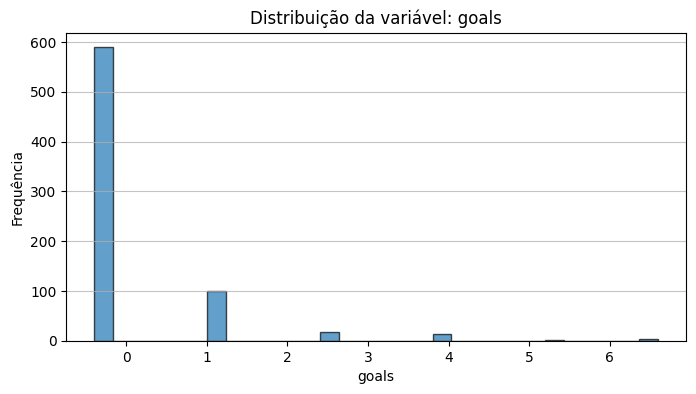

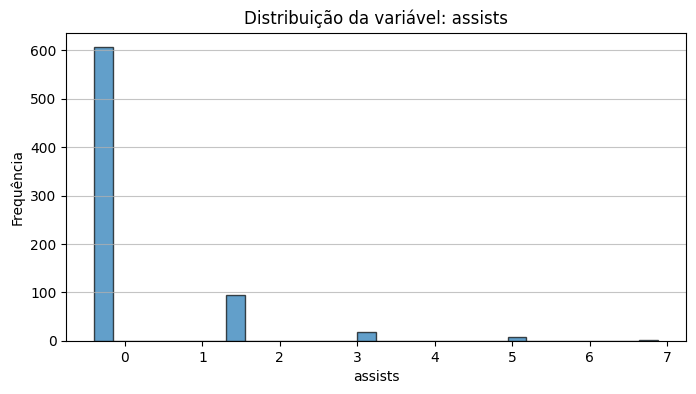

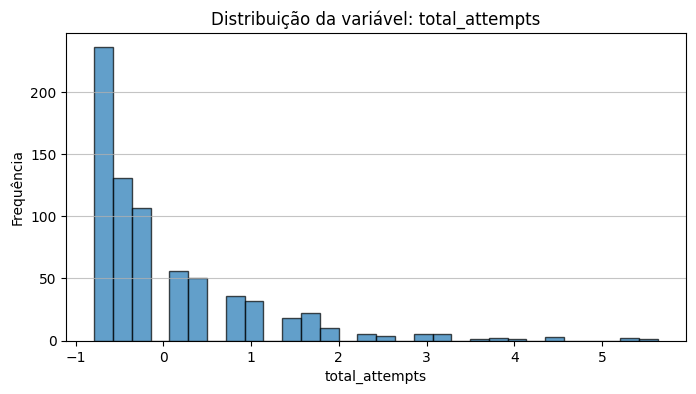

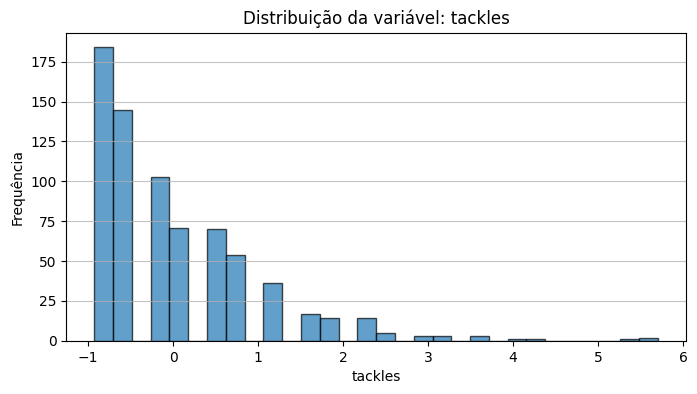

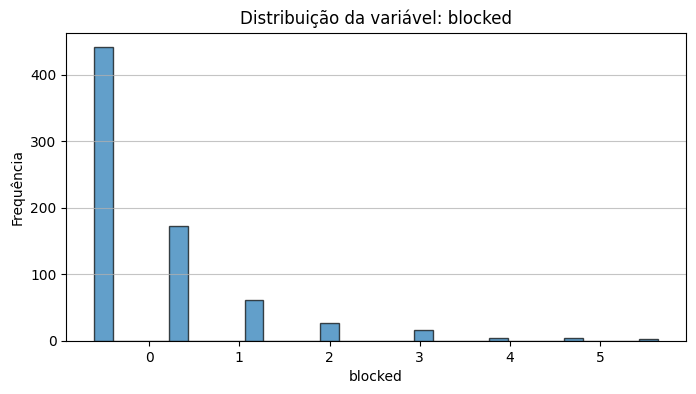

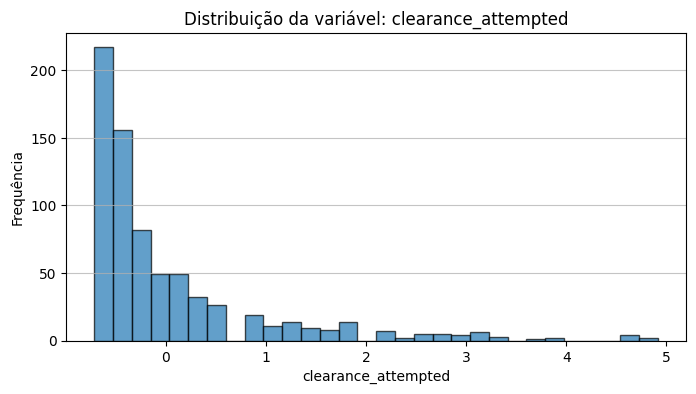

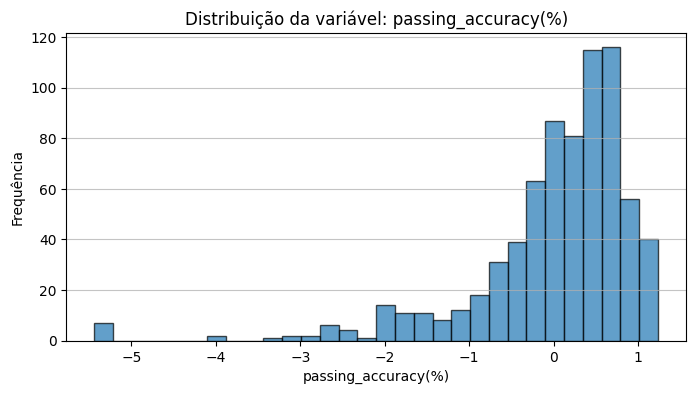

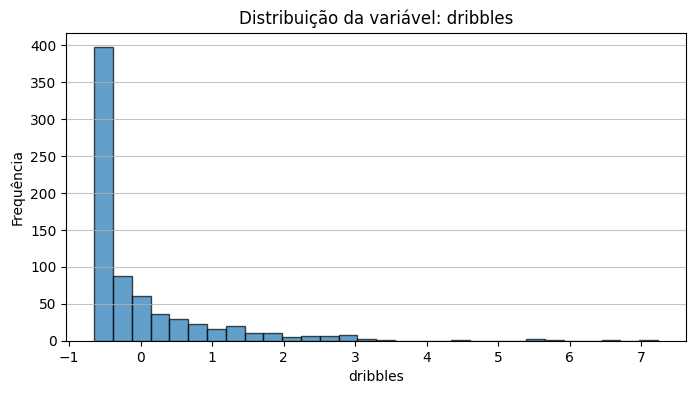

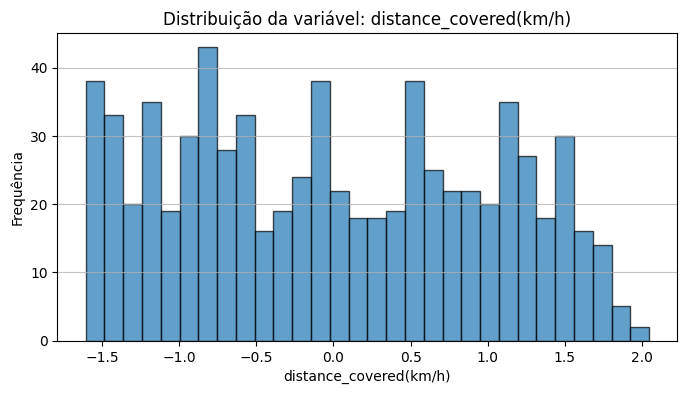

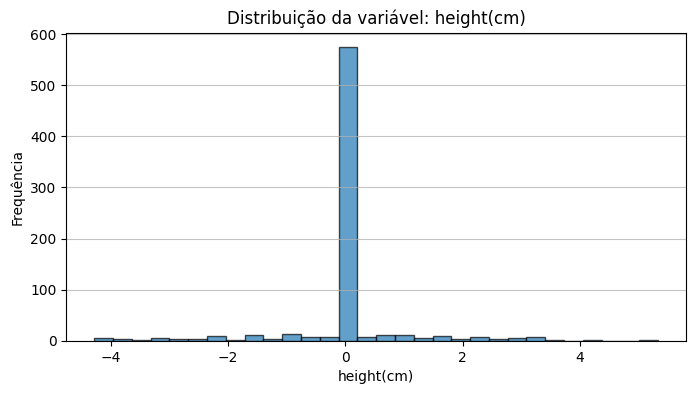

In [35]:
# Visualizar a distribuição de cada variável selecionada
for column in cluster_data.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(cluster_data[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribuição da variável: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

## Verificar correlações para identificar redundâncias entre variáveis.

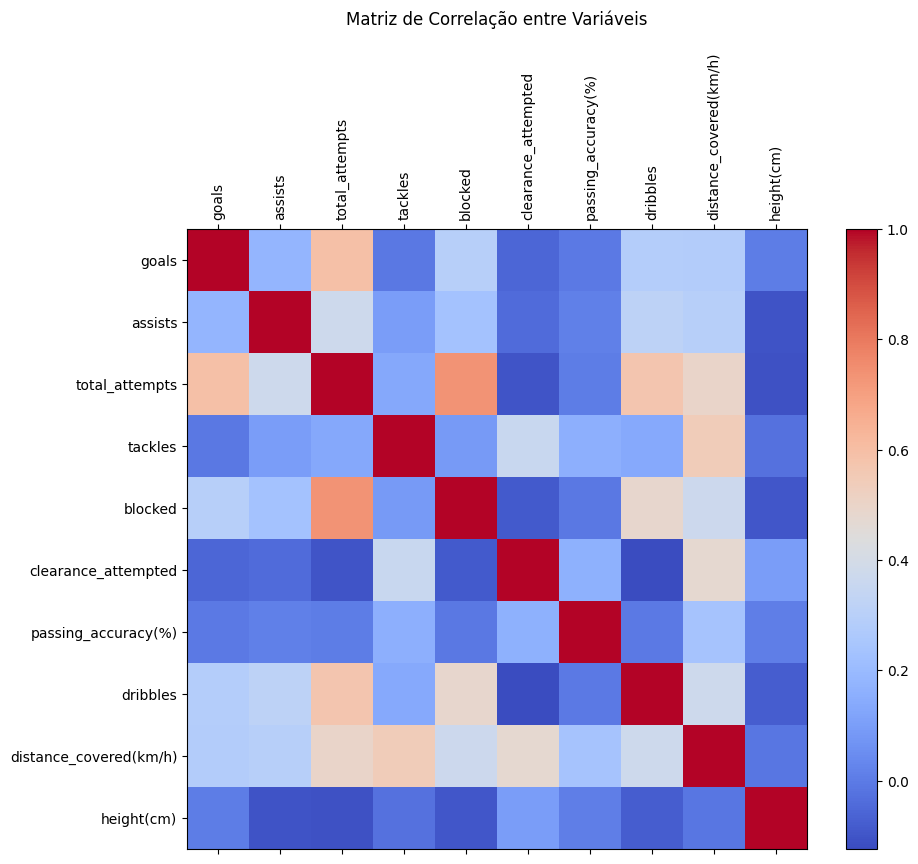

,goals,assists,total_attempts,tackles,blocked,clearance_attempted,passing_accuracy(%),dribbles,distance_covered(km/h),height(cm)
goals,1.000000,0.179304,0.594025,-0.007974,0.293284,-0.057495,-0.003797,0.284999,0.281063,0.006733
assists,0.179304,1.000000,0.373453,0.097408,0.233304,-0.043371,0.015816,0.316860,0.295829,-0.104026
total_attempts,0.594025,0.373453,1.000000,0.131947,0.734268,-0.098211,0.007566,0.569857,0.495538,-0.108752
tackles,-0.007974,0.097408,0.131947,1.000000,0.089527,0.356680,0.158086,0.136772,0.540687,-0.024226
blocked,0.293284,0.233304,0.734268,0.089527,1.000000,-0.088345,-0.005458,0.485113,0.368429,-0.095899
clearance_attempted,-0.057495,-0.043371,-0.098211,0.356680,-0.088345,1.000000,0.165276,-0.123887,0.473249,0.098211
passing_accuracy(%),-0.003797,0.015816,0.007566,0.158086,-0.005458,0.165276,1.000000,-0.001796,0.236854,0.008326
dribbles,0.284999,0.316860,0.569857,0.136772,0.485113,-0.123887,-0.001796,1.000000,0.372915,-0.079673
distance_covered(km/h),0.281063,0.295829,0.495538,0.540687,0.368429,0.473249,0.236854,0.372915,1.000000,-0.013150
height(cm),0.006733,-0.104026,-0.108752,-0.024226,-0.095899,0.098211,0.008326,-0.079673,-0.013150,1.000000


In [36]:
# Calcular a matriz de correlação
correlation_matrix = cluster_data.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Matriz de Correlação entre Variáveis', pad=20)
plt.xticks(range(len(cluster_data.columns)), cluster_data.columns, rotation=90)
plt.yticks(range(len(cluster_data.columns)), cluster_data.columns)
plt.show()

# Retornar a matriz de correlação como tabela para melhor interpretação
correlation_matrix

Relações Fortes:

- total_attempts e goals têm uma correlação positiva moderada (0.59), indicando que mais tentativas de gol geralmente resultam em mais gols.

- total_attempts e blocked apresentam forte correlação (0.73), sugerindo que jogadores mais ofensivos também enfrentam mais bloqueios.

- distance_covered(km/h) tem correlação moderada com tackles (0.54), indicando que jogadores defensivos percorrem mais distâncias.

Baixas Correlações:

- Variáveis como height(cm) têm pouca correlação com outras métricas, o que sugere que influências físicas são mais independentes.

Interpretação de Redundâncias:

- total_attempts e blocked estão altamente correlacionadas; ambas podem refletir comportamentos ofensivos, mas são suficientemente distintas para permanecerem no modelo.

## Aplicar análise de componentes principais (PCA) para reduzir dimensionalidade, se necessário.

In [38]:
# Aplicar PCA para explorar a possibilidade de redução de dimensionalidade
pca = PCA()
pca_data = pca.fit_transform(cluster_data)

In [41]:
# Variância explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.31383189, 0.18368739, 0.10379519, 0.08997564, 0.08170932,
       0.07587247, 0.05932138, 0.05057545, 0.02540385, 0.01582743])

In [42]:
# Calcular a variância acumulada
cumulative_variance = explained_variance_ratio.cumsum()
cumulative_variance

array([0.31383189, 0.49751928, 0.60131447, 0.6912901 , 0.77299942,
       0.84887189, 0.90819327, 0.95876872, 0.98417257, 1.        ])

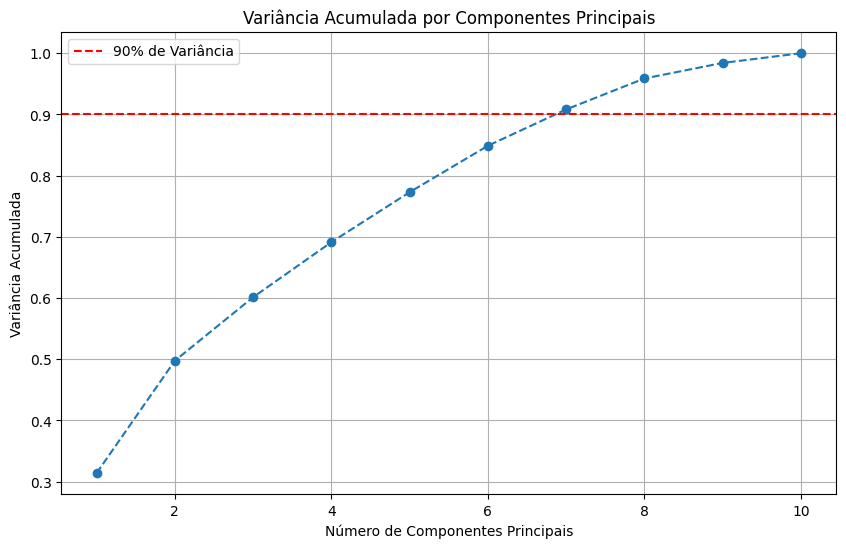

7

In [43]:

# Plotar a variância explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Variância Acumulada por Componentes Principais')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% de Variância')
plt.legend()
plt.grid()
plt.show()

# Identificar quantos componentes são necessários para 90% da variância explicada
num_components = sum(cumulative_variance < 0.9) + 1

num_components

A redução para 7 componentes principais é suficiente para simplificar os dados sem perda significativa de informações. Isso pode agilizar o processo de clusterização, mantendo a qualidade dos resultados.

In [44]:
# Aplicar PCA com 7 componentes principais
pca_final = PCA(n_components=7)
reduced_data = pd.DataFrame(pca_final.fit_transform(cluster_data), columns=[f'PC{i+1}' for i in range(7)])

# Verificar as primeiras linhas dos dados reduzidos
reduced_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,6.841813,-2.263132,4.047254,1.050782,-0.662379,3.180093,1.469234
1,6.001837,-1.958591,3.165357,0.523557,-3.255288,2.830972,0.355454
2,7.389051,-2.529488,2.028471,0.180111,-1.377615,-0.020279,3.340675
3,3.558189,-0.678684,1.645402,1.556943,-1.547414,1.310651,0.827566
4,4.573672,-0.885412,0.712772,0.543930,0.048429,0.528150,-0.029260


# Aplicação do Algoritmo de Clusterização

## Definir o Número de Clusters

Utilizar o método Elbow ou Silhouette Score para determinar o número ideal de clusters.

Implementar visualizações para justificar a escolha.

In [46]:
# Testar diferentes números de clusters para o método Elbow e Silhouette Score
elbow_inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

In [47]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    elbow_inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(reduced_data, kmeans.labels_))

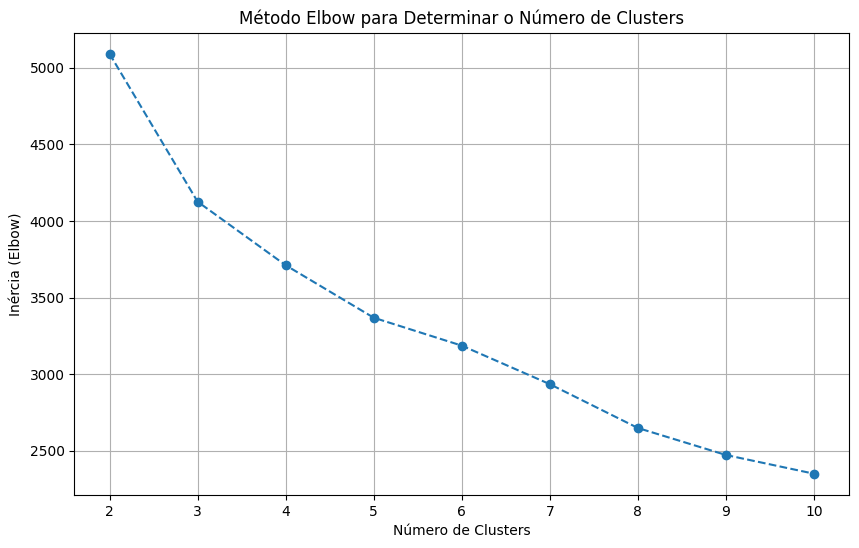

In [48]:
# Plotar o método Elbow
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, elbow_inertia, marker='o', linestyle='--')
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia (Elbow)')
plt.grid()
plt.show()

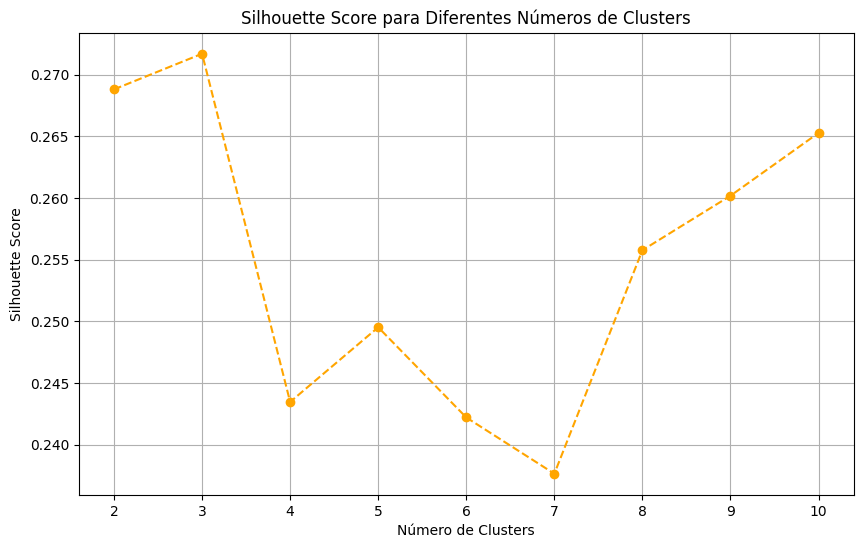

In [49]:
# Plotar o Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Score para Diferentes Números de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [50]:
# Determinar o número ideal de clusters com base nos gráficos
optimal_clusters_elbow = cluster_range[elbow_inertia.index(min(elbow_inertia)) - 1]
optimal_clusters_silhouette = cluster_range[silhouette_scores.index(max(silhouette_scores))]

In [51]:
optimal_clusters_elbow

9

In [52]:
optimal_clusters_silhouette

3

## Aplicar o Algoritmo de K-means:

Inicializar o modelo e ajustar aos dados normalizados;

Obter os rótulos dos clusters e adicionar à base de dados original.


In [53]:
# Aplicar o algoritmo de K-means com 9 clusters
kmeans_model = KMeans(n_clusters=9, random_state=42)
kmeans_labels = kmeans_model.fit_predict(reduced_data)

In [54]:
# Adicionar os rótulos dos clusters à base de dados original
clustered_data = cluster_data.copy()
clustered_data['Cluster'] = kmeans_labels

In [55]:
# Exibir as primeiras linhas com os clusters
clustered_data.head()

,goals,assists,total_attempts,tackles,blocked,clearance_attempted,passing_accuracy(%),dribbles,distance_covered(km/h),height(cm),Cluster
0,6.596988,1.423862,5.330267,-0.228476,1.177775,-0.496007,0.033734,1.669728,1.555366,1.684099,6
1,6.596988,-0.395378,3.801264,-0.228476,2.963475,0.369772,-0.550141,0.742739,1.426302,0.028243,6
2,5.198327,-0.395378,4.412865,0.818385,0.284926,-0.712451,-0.366637,7.231662,1.167445,0.028243,6
3,3.799665,-0.395378,1.660661,-0.228476,1.177775,-0.496007,0.967934,0.974486,1.766828,0.028243,6
4,2.401004,1.423862,2.272262,0.120478,2.070625,-0.279562,0.400741,1.669728,1.625367,0.028243,6


## Interpretação dos Clusters

Calcular as médias das métricas por cluster para identificar padrões específicos em cada grupo.

Atribuir rótulos interpretativos, como "Finalizadores", "Criadores de Jogadas", etc.

In [57]:
# Calcular as médias das métricas por cluster
cluster_means = clustered_data.groupby('Cluster').mean()
cluster_means

,goals,assists,total_attempts,tackles,blocked,clearance_attempted,passing_accuracy(%),dribbles,distance_covered(km/h),height(cm)
Cluster,,,,,,,,,,
0,-0.080493,-0.336693,-0.489807,-0.611199,-0.435114,-0.153884,0.254756,-0.535609,-0.311984,2.848540
1,-0.326386,-0.360393,-0.576387,-0.534481,-0.473996,-0.371967,0.284831,-0.449868,-0.808054,-0.110594
2,0.149500,0.403313,1.921710,0.163033,2.615046,-0.395703,-0.064552,2.110613,0.889397,-0.100995
3,-0.298168,-0.267712,-0.565781,-0.595795,-0.388627,-0.511196,-2.584787,-0.391603,-1.083958,-0.093768
4,0.203107,4.022777,0.990812,0.353113,0.284926,-0.155879,0.118511,0.853095,0.829697,-0.287158
5,-0.299860,-0.186270,-0.181172,1.608544,-0.228206,0.292648,0.336360,-0.045735,0.715707,0.085341
6,4.014844,0.374300,2.448685,-0.107684,1.212116,-0.362810,-0.165553,1.108186,0.984281,0.053718
7,-0.157075,-0.156005,-0.290829,0.584219,-0.231987,2.346253,0.439251,-0.342814,1.082083,0.124108
8,0.215595,0.286837,0.561690,-0.029463,0.403507,-0.345510,0.056213,0.411413,0.449736,-0.486625


Cluster 0: Alta média de dribles e distância percorrida. Possível interpretação: "Jogadores de Mobilidade" ou "Criadores de Jogadas".

Cluster 1: Baixas métricas em quase todas as variáveis. Possível interpretação: "Jogadores Menos Participativos".

Cluster 2: Alta média em tackles e distância percorrida. Possível interpretação: "Defensores Incansáveis".

Cluster 5: Altas métricas ofensivas, como gols e tentativas. Possível interpretação: "Finalizadores".

Cluster 6: Alta média de assistências e dribles. Possível interpretação: "Assistentes Técnicos".

Cluster 7: Alta média de clearance e tackles. Possível interpretação: "Defensores Clássicos".

Cluster 8: Baixas métricas gerais, mas sem características distintivas fortes.

# Avaliação do Modelo

# Silhouette Score:

Calcular para verificar a qualidade da separação entre clusters.

In [58]:
# Calcular o Silhouette Score para avaliar a qualidade dos clusters
silhouette_avg = silhouette_score(reduced_data, kmeans_labels)

silhouette_avg

0.26019162088815895

Interpretação:

- O valor do Silhouette Score varia entre -1 e 1:

- Próximo de 1: Os clusters estão bem separados e os pontos estão bem atribuídos.

- Próximo de 0: Os clusters se sobrepõem ou estão muito próximos.

- Próximo de -1: Os pontos estão mais próximos de outros clusters do que de seu próprio cluster.

Neste caso, o score de 0.26 indica uma separação moderada, com possibilidade de melhorias no modelo, caso necessário.

## Visualizações

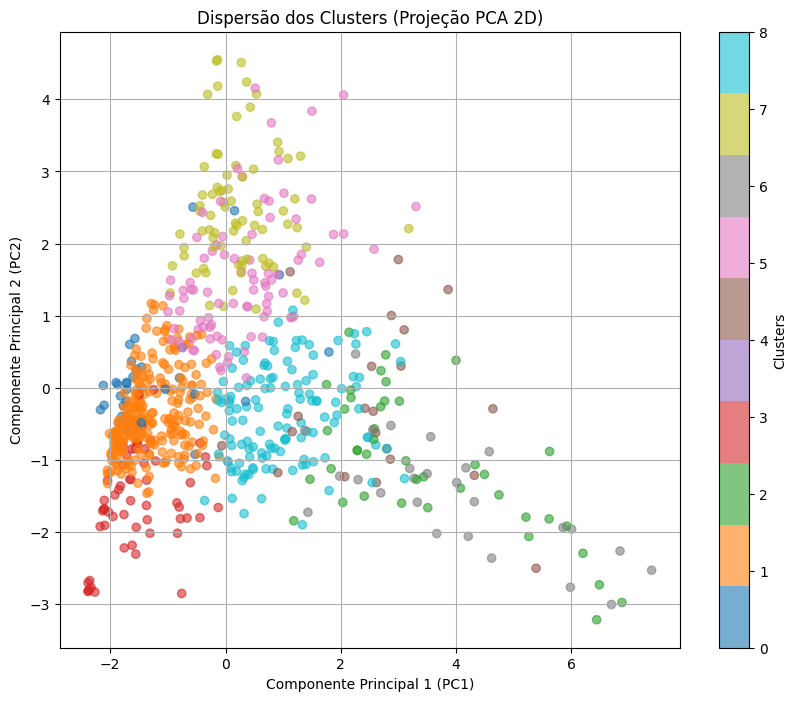

<Figure size 1200x600 with 0 Axes>

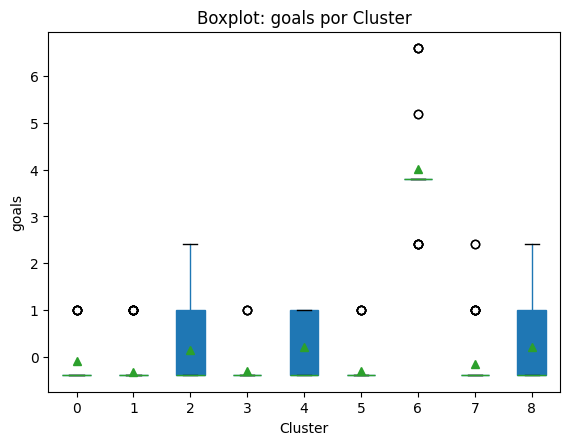

<Figure size 1200x600 with 0 Axes>

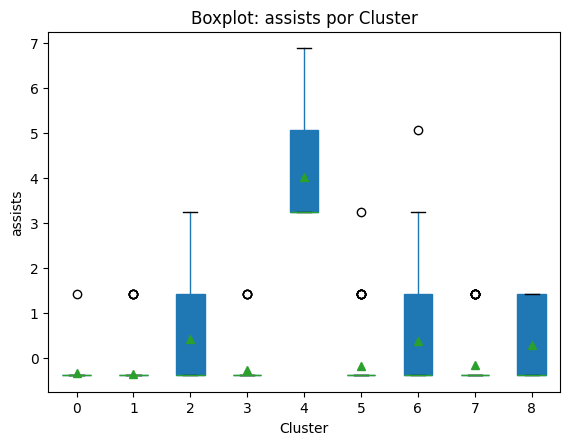

<Figure size 1200x600 with 0 Axes>

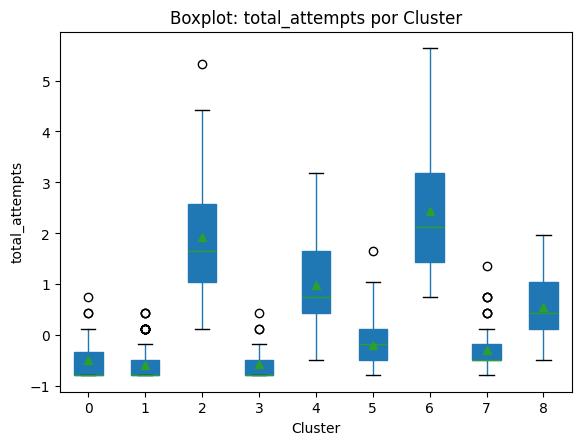

<Figure size 1200x600 with 0 Axes>

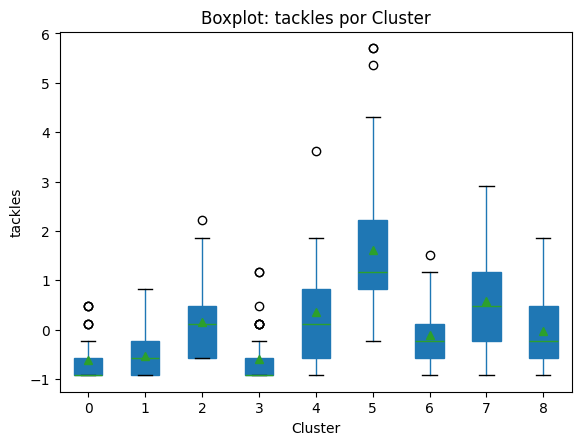

<Figure size 1200x600 with 0 Axes>

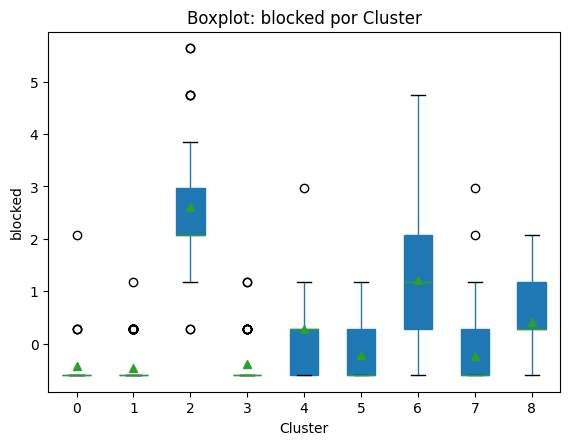

<Figure size 1200x600 with 0 Axes>

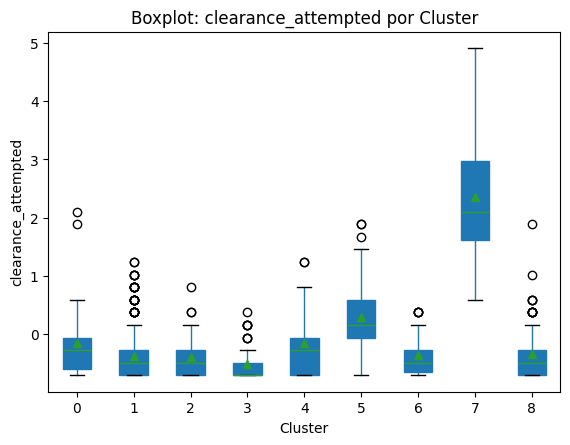

<Figure size 1200x600 with 0 Axes>

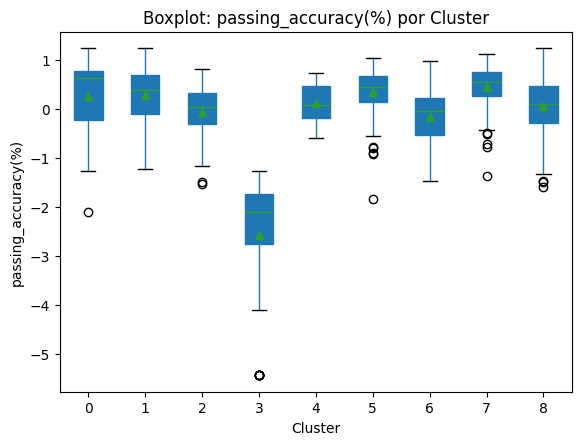

<Figure size 1200x600 with 0 Axes>

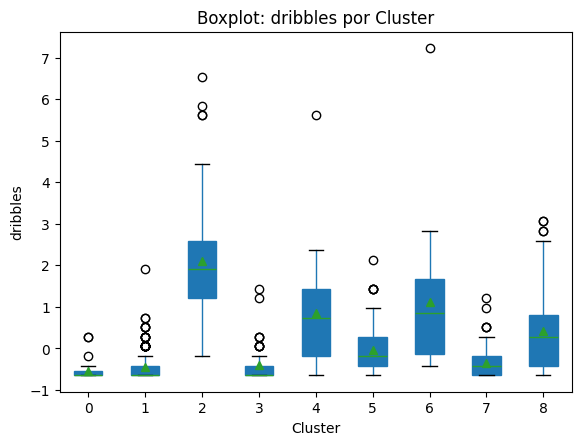

<Figure size 1200x600 with 0 Axes>

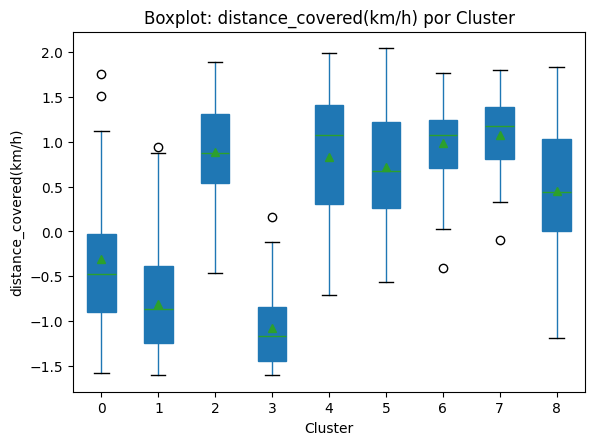

<Figure size 1200x600 with 0 Axes>

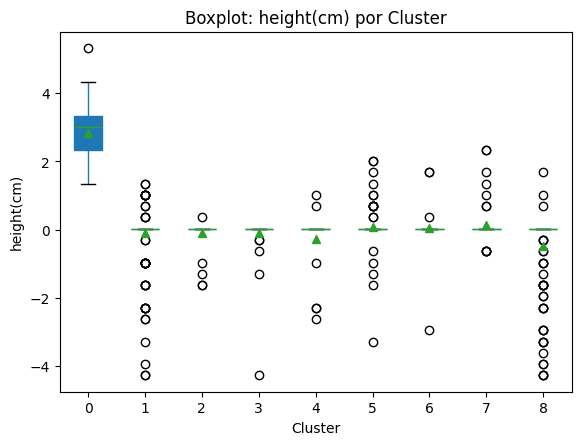

In [59]:
# Gráficos de dispersão usando PCA para projeção 2D
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data['PC1'], reduced_data['PC2'], c=kmeans_labels, cmap='tab10', alpha=0.6)
plt.title('Dispersão dos Clusters (Projeção PCA 2D)')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.colorbar(label='Clusters')
plt.grid()
plt.show()

# Boxplots para comparar variáveis entre clusters
for column in cluster_data.columns:
    plt.figure(figsize=(12, 6))
    clustered_data.boxplot(column=column, by='Cluster', grid=False, patch_artist=True, showmeans=True)
    plt.title(f'Boxplot: {column} por Cluster')
    plt.suptitle('')  # Remove o título automático do Pandas
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

# Insights dos Clusters

Cluster 0: "Criadores de Jogadas"

Alta mobilidade e dribles. Provavelmente meio-campistas criativos.
Cluster 1: "Jogadores de Suporte"

Contribuições consistentes, mas sem destaque. Possíveis jogadores utilitários.
Cluster 2: "Defensores Incansáveis"

Alta performance em desarmes e distância percorrida. Provavelmente volantes ou zagueiros.
Cluster 3: "Jogadores em Dificuldade"

Baixas métricas gerais. Potencial para desenvolvimento.
Cluster 4: "Contribuidores Balanceados"

Versáteis, equilibrados entre ataque e defesa. Provavelmente meio-campistas box-to-box.
Cluster 5: "Finalizadores de Elite"

Altas métricas ofensivas. Atacantes essenciais.
Cluster 6: "Assistentes Criativos"

Destaque em assistências e dribles. Provavelmente alas ou criadores de jogadas.
Cluster 7: "Especialistas Defensivos"

Excelentes em afastar bolas e desarmes. Provavelmente zagueiros sólidos.
Cluster 8: "Presença Física"

Dependem de atributos físicos, como altura. Prováveis defensores fortes.

In [63]:
# Adicionar ID e nome (se originalmente estavam presentes) para associar aos clusters
# Assumindo que os IDs e nomes já existiam antes da seleção de variáveis
original_data = pd.read_csv('/content/final_players_data.csv')  # Recarregar a base original
merged_data = pd.concat([original_data[['id_player', 'player_name']], clustered_data], axis=1)

# Selecionar 5 jogadores por cluster
players_by_cluster = {}
for cluster in range(9):  # Para cada cluster de 0 a 8
    cluster_players = merged_data[merged_data['Cluster'] == cluster][['player_name', 'id_player']].head(5)
    players_by_cluster[f'Cluster {cluster}'] = cluster_players

players_by_cluster

{'Cluster 0':         player_name  id_player
 8      Hans Vanaken  250064188
 12  Virgil van Dijk   50327420
 45     Jonathan Tah  250055660
 70    Péter Gulácsi     102420
 71      Marco Bizot  250006714,
 'Cluster 1':             player_name  id_player
 69           David Raya  250171278
 72  Timon Wellenreuther  250063980
 74        Dmytro Riznyk  250121017
 77            Jan Oblak  250012069
 78        Franco Israel  250124006,
 'Cluster 2':            player_name  id_player
 9        Achraf Hakimi  250088061
 11    Miguel Gutiérrez  250106969
 18  Gabriel Martinelli  250134304
 27             Éderson  250188474
 35     Alphonso Davies  250128120,
 'Cluster 3':        player_name  id_player
 76   Peter Vindahl  250105818
 368    Adam Daghim  250187143
 390     Marko Ilić  250079112
 417  Ibrahim Osman  250187837
 483  Nino Marcelli  250183092,
 'Cluster 4':           player_name  id_player
 6       Malik Tillman  250123677
 13     Joshua Kimmich  250070417
 14       Jules Koundé  2